In [57]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_error
import pandas as pd
from sklearn.metrics import mean_absolute_error as sklearn_mae
from sktime.forecasting.fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [58]:
currency = pd.read_csv("/Users/khasherdenechingun/Desktop/New_Project_Chingun/data/raw/Excel Data/China Currency.csv",
                       parse_dates=[0], index_col=[0])

/var/folders/yj/0v9xz8px6153snph547671900000gn/T/ipykernel_42137/1045842192.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency = pd.read_csv("/Users/khasherdenechingun/Desktop/New_Project_Chingun/data/raw/Excel Data/China Currency.csv",


In [59]:
currency = currency.apply(pd.to_numeric, errors='coerce')

<Axes: xlabel='Date'>

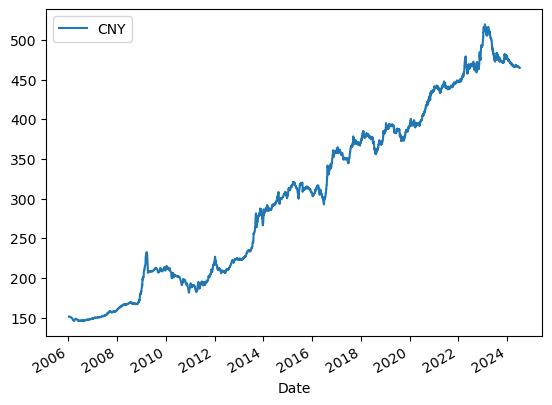

In [60]:
currency.plot()

In [61]:
forecast_df = currency.resample(rule="MS").sum()

In [62]:
forecaster = Prophet()
horizon = 30
df = forecast_df["CNY"]

In [63]:
y_train = df[:-horizon]
y_test = df.tail(horizon)
forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred_prophet = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9)
y_true = df.tail(horizon)
mae = sklearn_mae(y_true, y_pred_prophet)

16:41:54 - cmdstanpy - INFO - Chain [1] start processing
16:41:54 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
forecaster = Prophet()
forecaster.fit(df)

last_date = df.index.max()
fh = ForecastingHorizon(
    pd.date_range(start=str(last_date), periods=horizon, freq="MS"),
    is_relative=False,
)

y_pred_prophet = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")

16:41:55 - cmdstanpy - INFO - Chain [1] start processing
16:41:55 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
# plt.plot(
#     df.tail(horizon * 3),
#     label="Actual",
#     color="black",
# )
# plt.gca().fill_between(
#     ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
# )
# plt.plot(y_pred, label="Predicted")
# plt.ylim(bottom=0)
# plt.legend()
# plt.show()
# plt.show()

In [66]:
X_train = np.arange(len(y_train)).reshape(-1, 1)
y_train_values = y_train.values
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_values)

LinearRegression()

In [67]:
X_test = np.arange(len(y_train), len(y_train) + len(y_test)).reshape(-1, 1)
y_pred_linear = linear_model.predict(X_test)

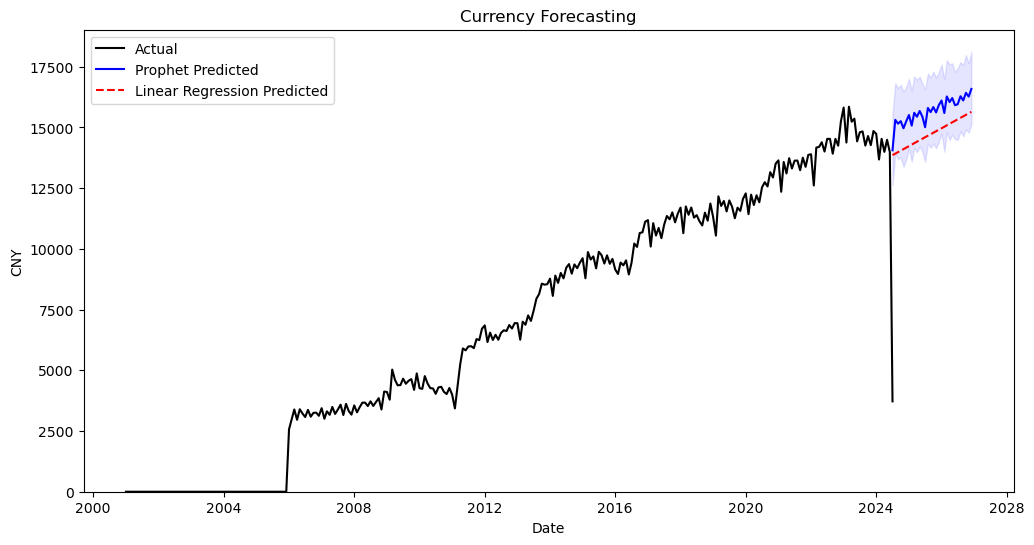

In [68]:
plt.figure(figsize=(12, 6))

plt.plot(df, label="Actual", color="black")

plt.plot(pd.date_range(start=str(last_date), periods=horizon, freq="MS"), y_pred_prophet, label="Prophet Predicted", color="blue")
plt.fill_between(pd.date_range(start=str(last_date), periods=horizon, freq="MS"), ci.iloc[:, 0], ci.iloc[:, 1], color="blue", alpha=0.1)

plt.plot(pd.date_range(start=str(last_date), periods=horizon, freq="MS"), y_pred_linear, label="Linear Regression Predicted", color="red", linestyle='--')

plt.title('Currency Forecasting')
plt.xlabel('Date')
plt.ylabel('CNY')
plt.ylim(bottom=0)
plt.legend()
plt.show()
